<a href="https://colab.research.google.com/github/318245915/Reconocimiento-de-Patrones-y-Aprendizaje-Automatizado/blob/main/Pr%C3%A1ctica_3_Normalizaci%C3%B3n%2C_Funciones_de_activaci%C3%B3n%2C_EarlyStopping%2C_Red_Neuronal_Artificial_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
68/68 [==============================] - 3s 19ms/step - loss: 0.6799 - accuracy: 0.5833 - val_loss: 0.6426 - val_accuracy: 0.6422
Epoch 2/50
68/68 [==============================] - 1s 12ms/step - loss: 0.5895 - accuracy: 0.7296 - val_loss: 0.5189 - val_accuracy: 0.8050
Epoch 3/50
68/68 [==============================] - 1s 9ms/step - loss: 0.4750 - accuracy: 0.8541 - val_loss: 0.4444 - val_accuracy: 0.8691
Epoch 4/50
68/68 [==============================] - 1s 9ms/step - loss: 0.4253 - accuracy: 0.8991 - val_loss: 0.4104 - val_accuracy: 0.8981
Epoch 5/50
68/68 [==============================] - 1s 10ms/step - loss: 0.3956 - accuracy: 0.9113 - val_loss: 0.3859 - val_accuracy: 0.9115
Epoch 6/50
68/68 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.9234 - val_loss: 0.3656 - val_accuracy: 0.9235
Epoch 7/50
68/68 [==============================] - 0s 4ms/step - loss: 0.3529 - accuracy: 0.9301 - val_loss: 0.3478 - val_accuracy: 0.9299
Epoch 8/50
68/68 

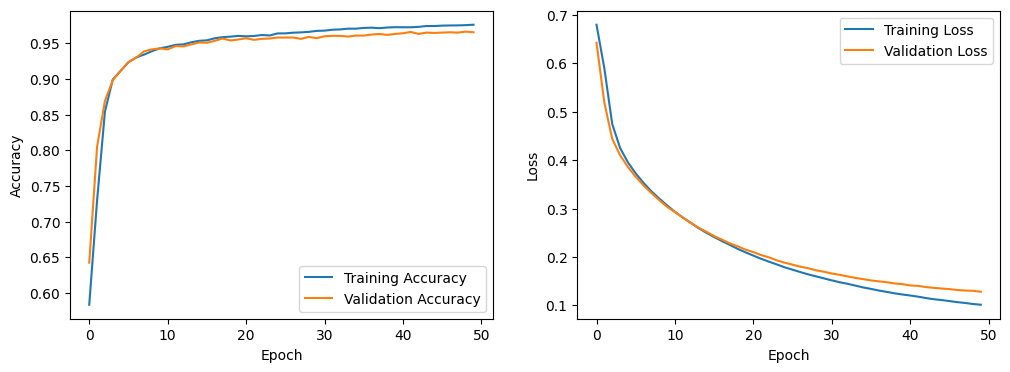

313/313 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9586
Test Loss: 0.1044, Test Accuracy: 0.9586
313/313 [==============================] - 1s 2ms/step


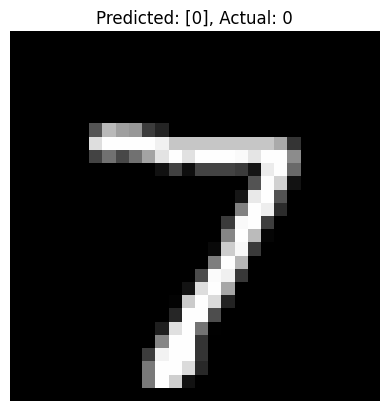

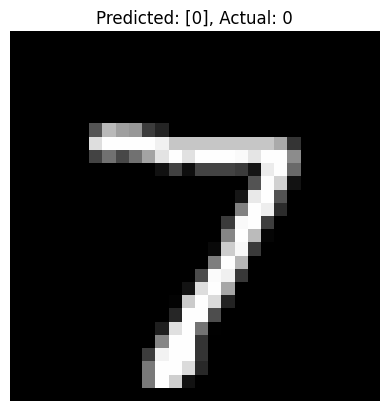

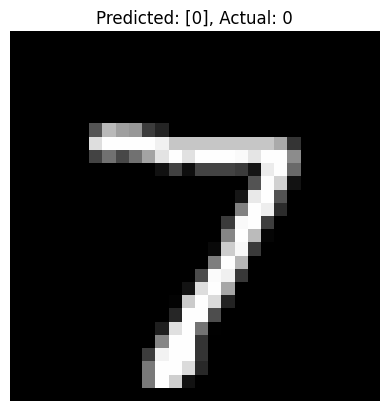

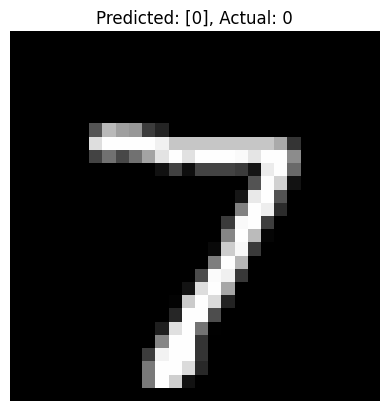

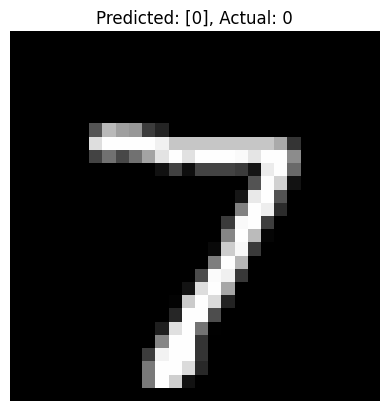

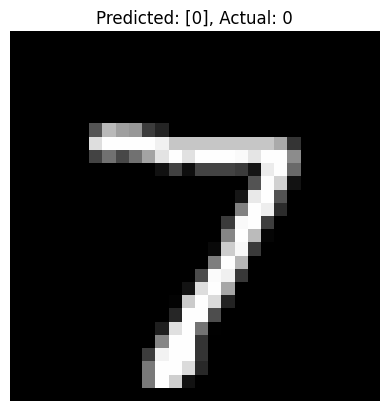

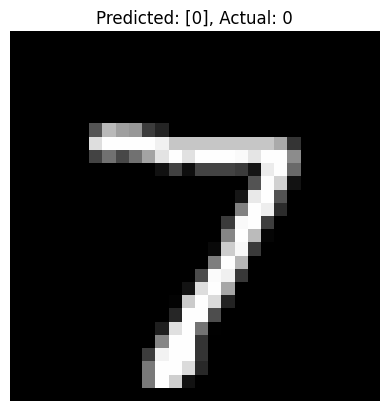

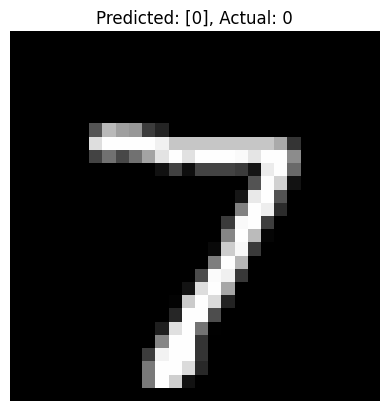

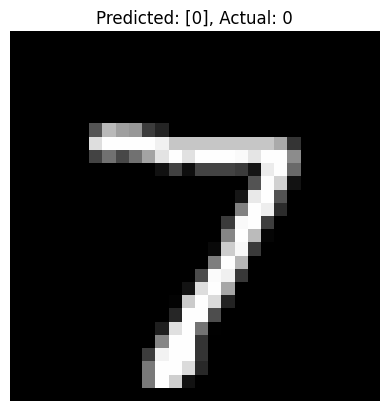

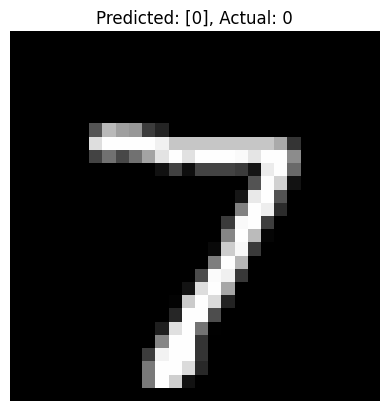

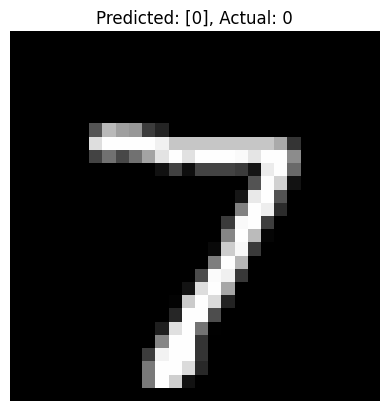

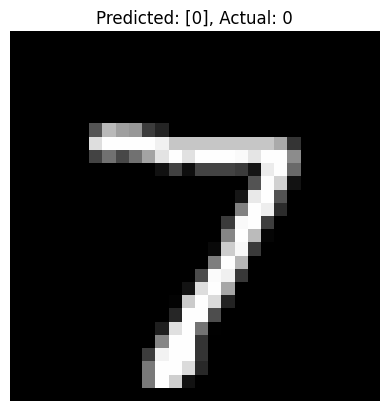

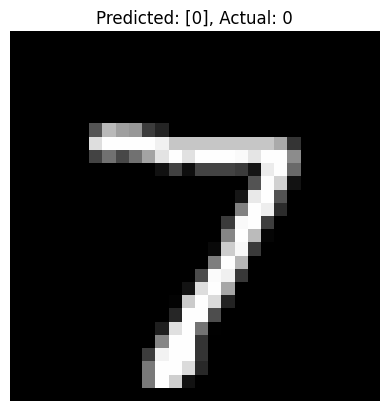

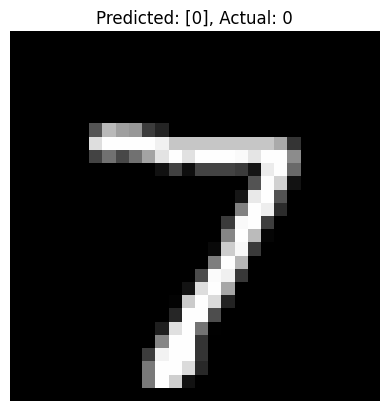

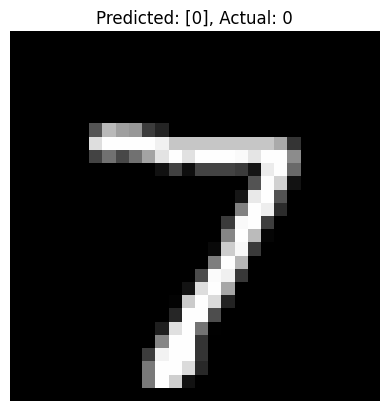

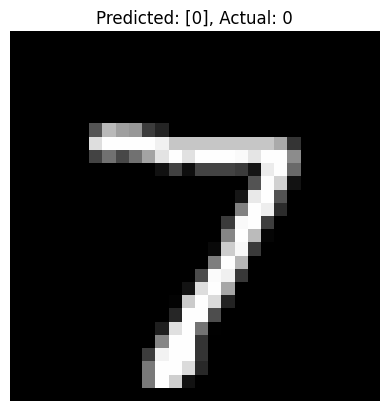

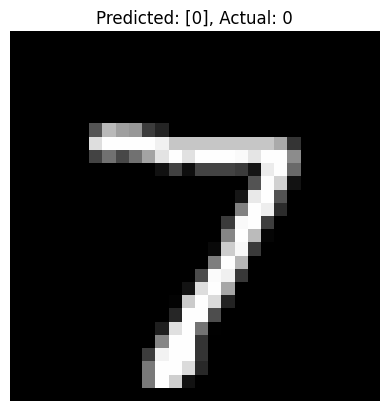

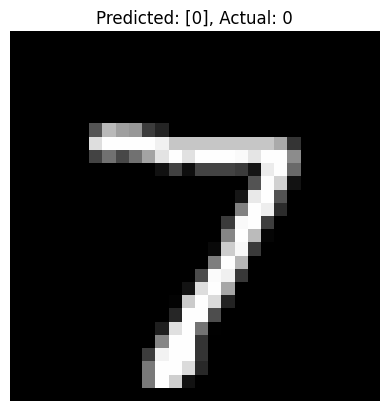

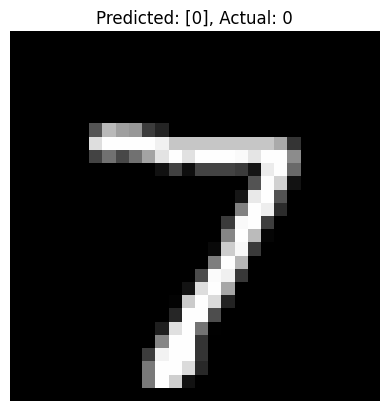

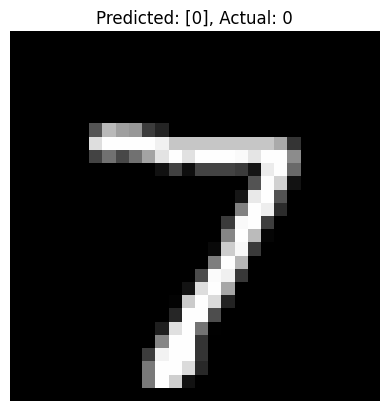

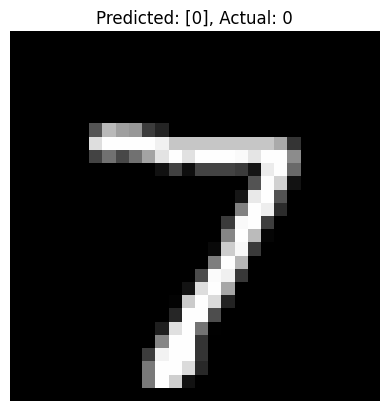

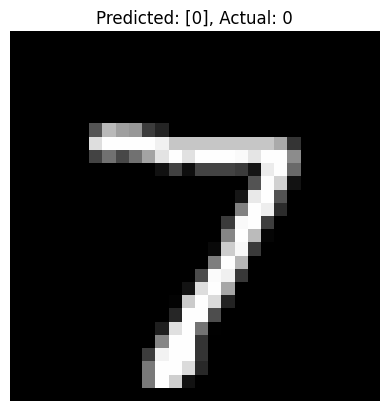

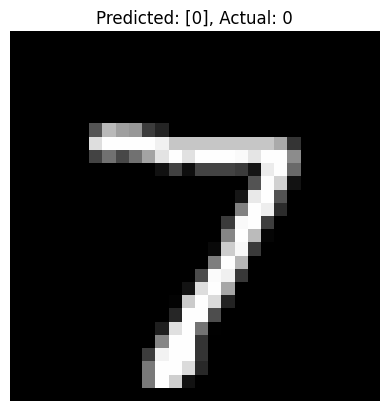

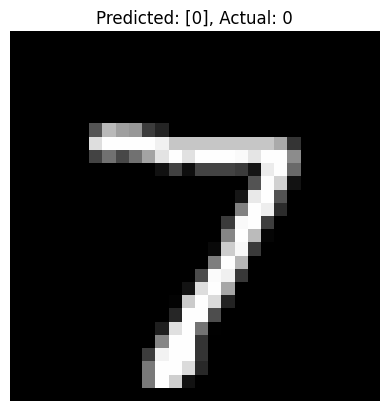

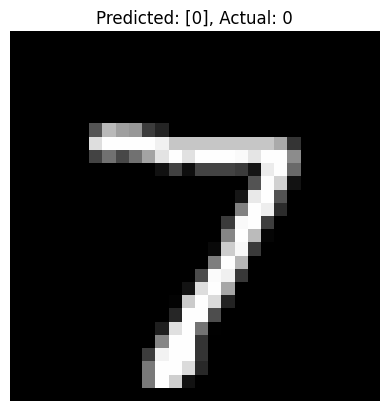

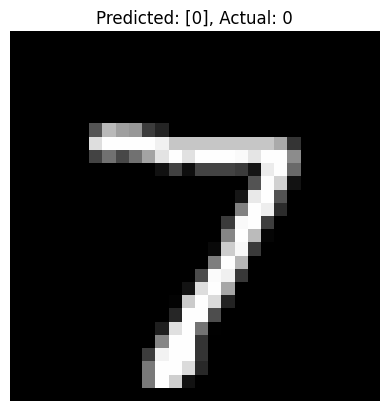

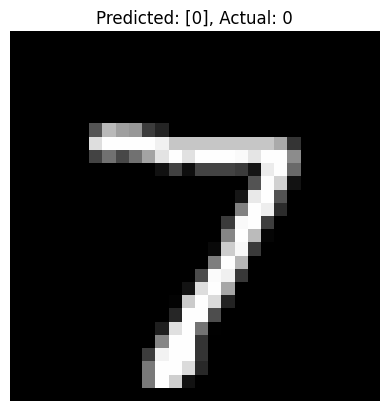

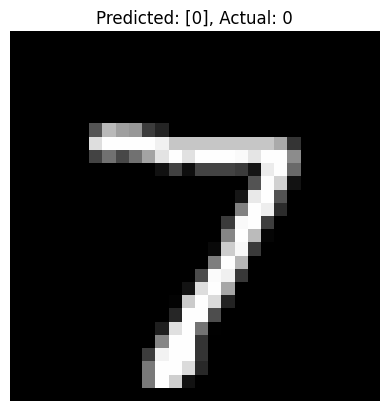

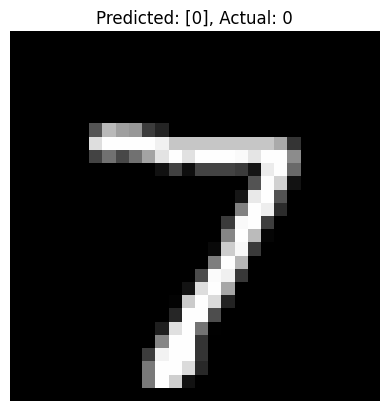

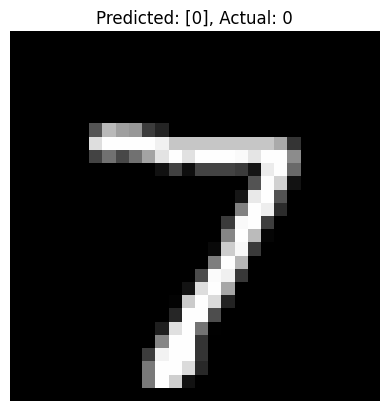

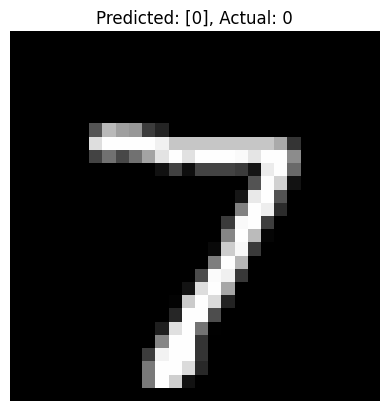

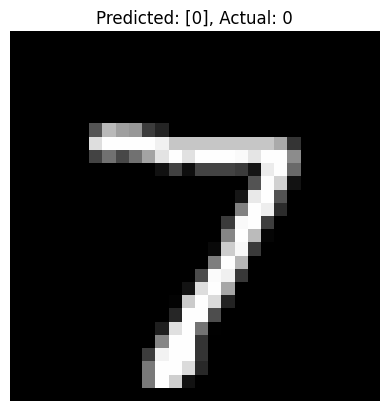

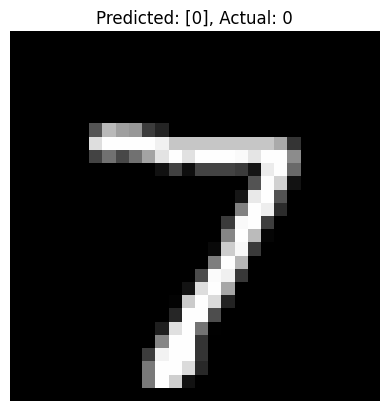

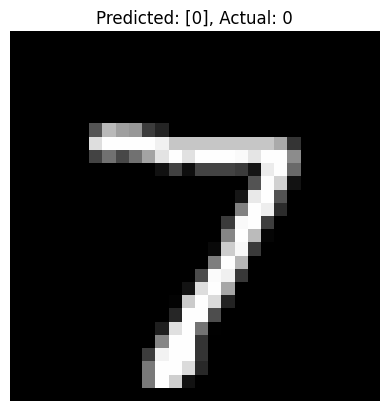

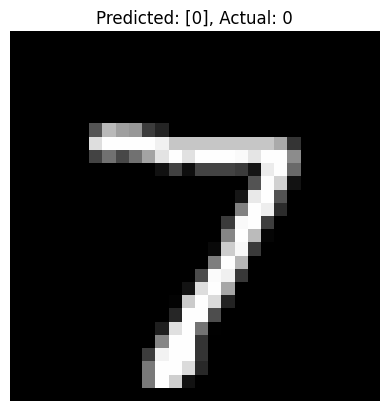

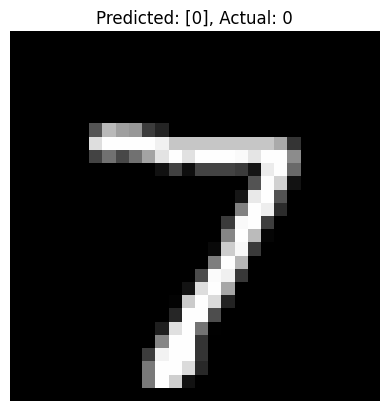

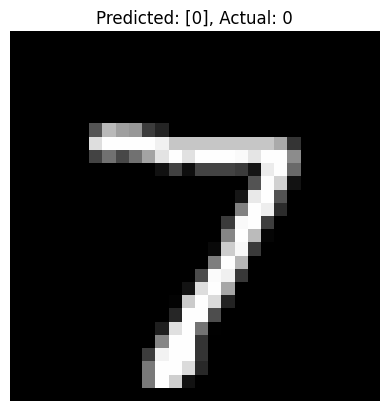

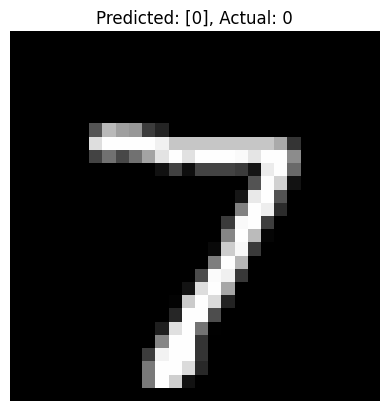

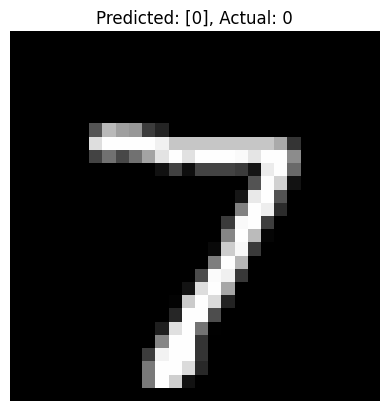

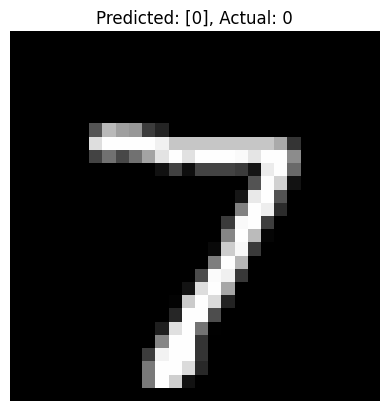

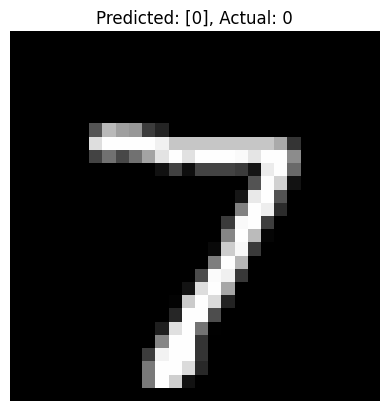

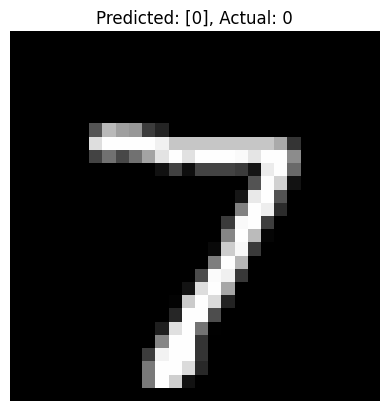

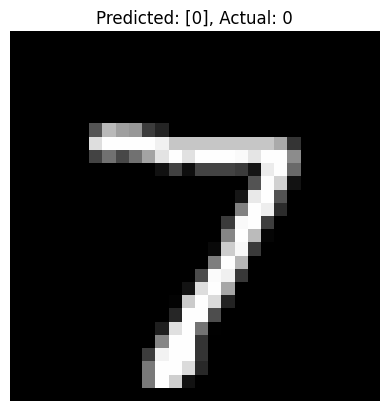

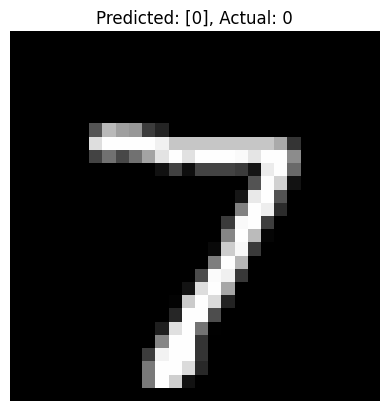

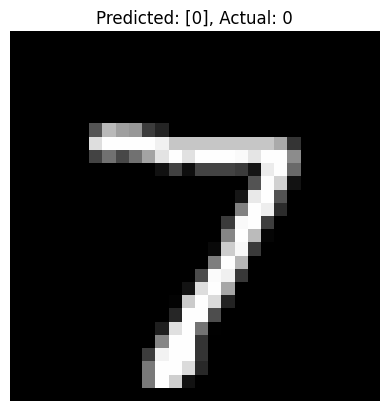

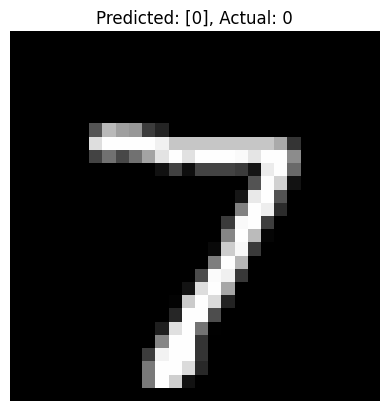

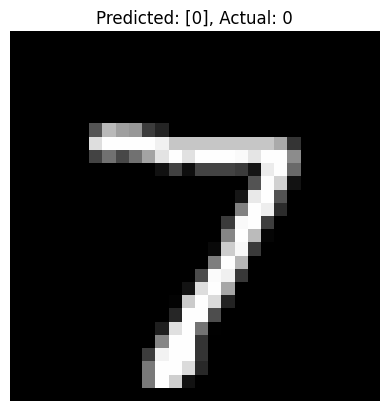

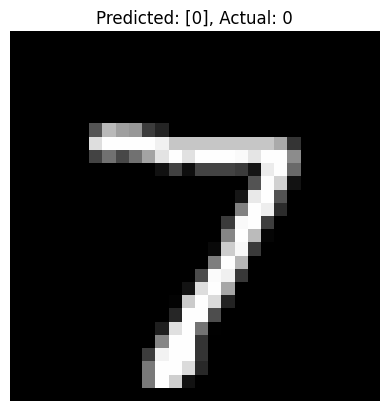

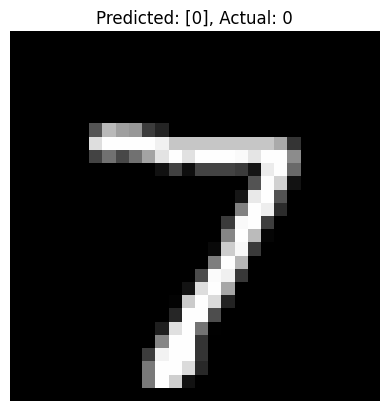

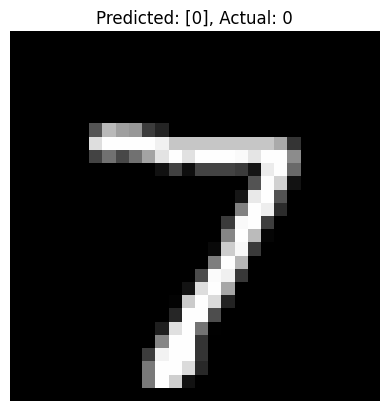

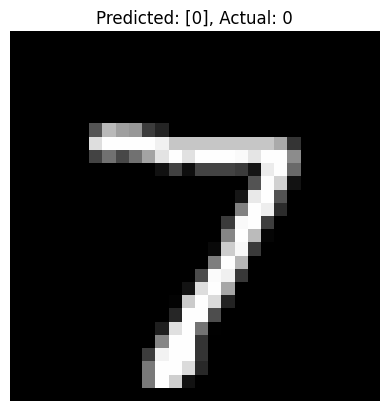

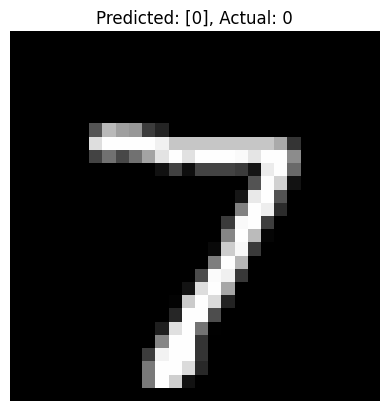

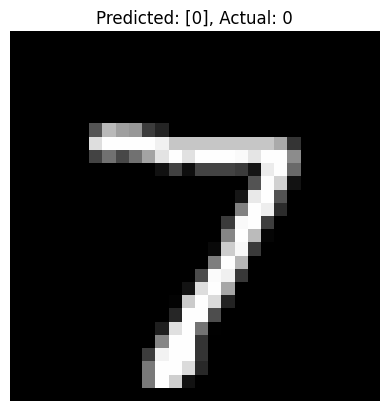

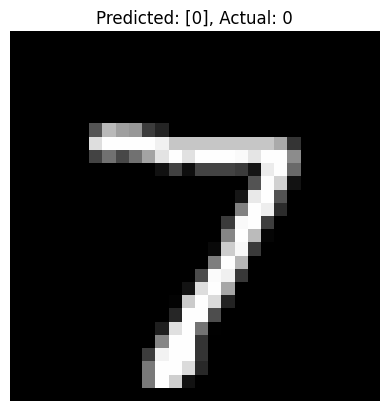

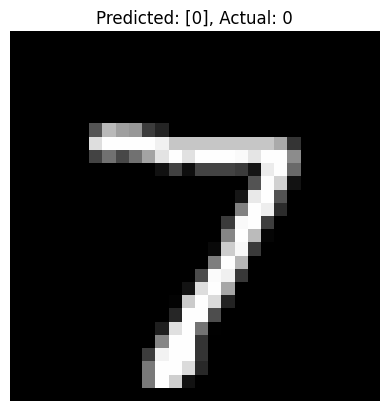

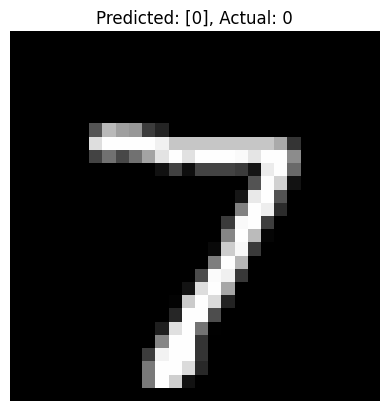

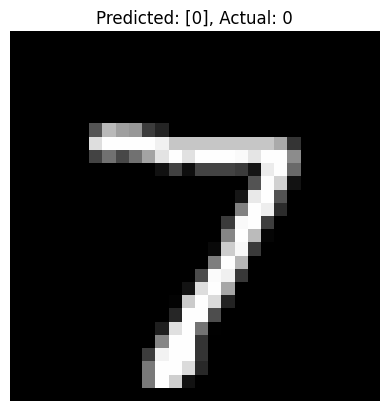

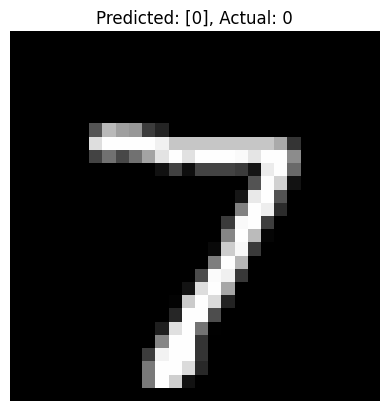

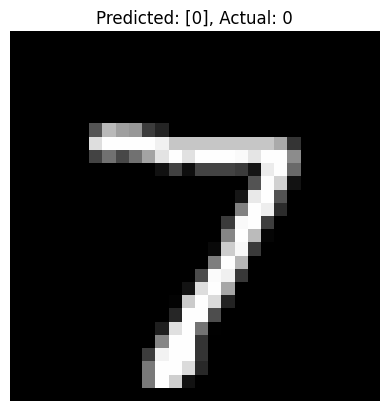

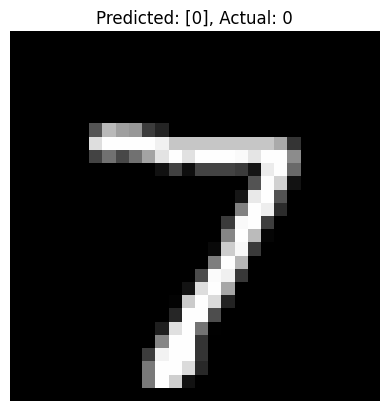

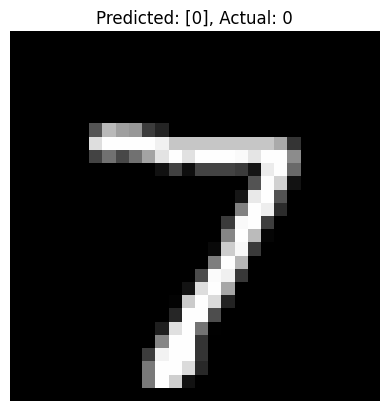

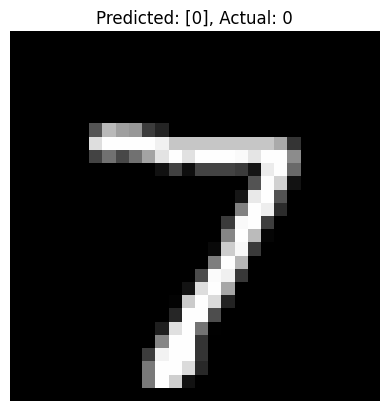

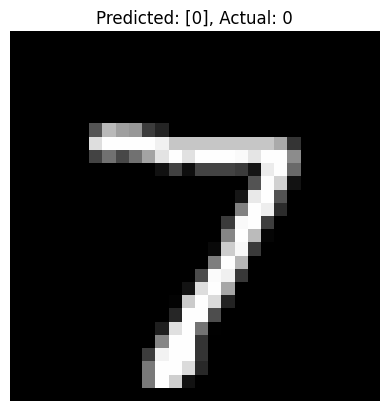

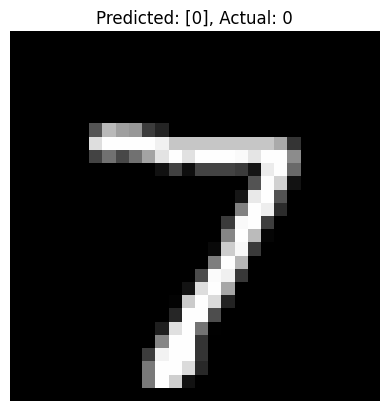

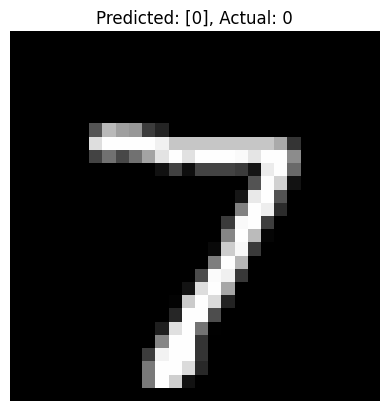

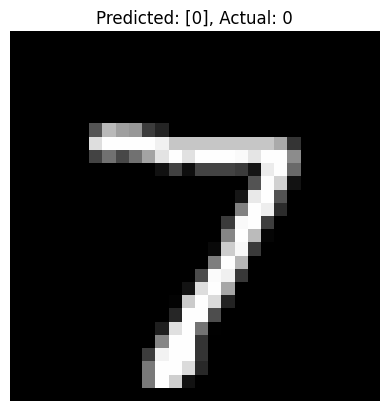

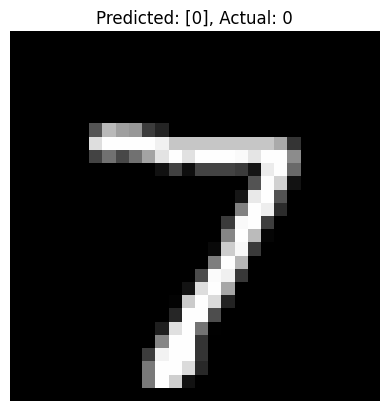

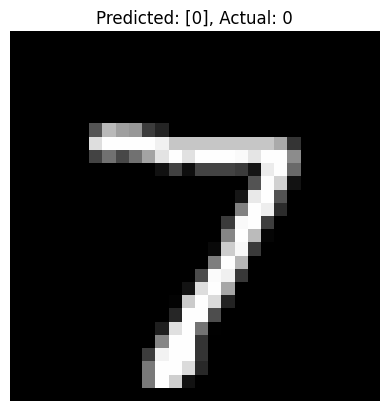

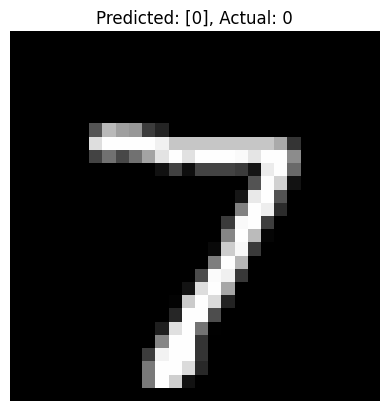

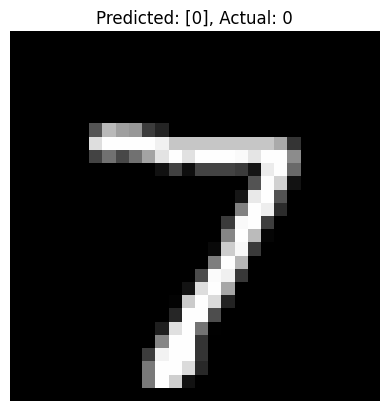

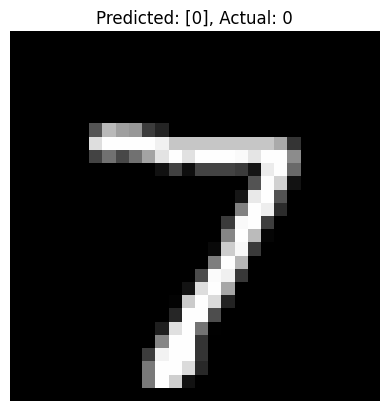

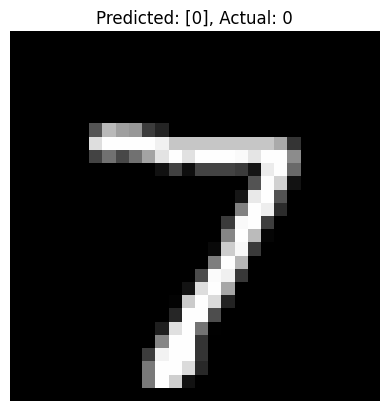

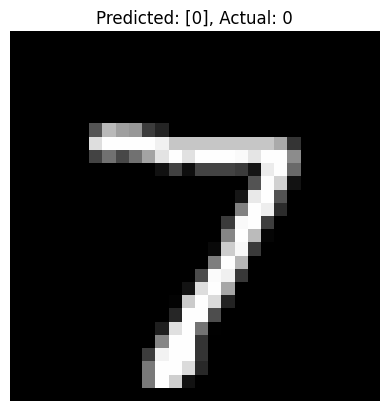

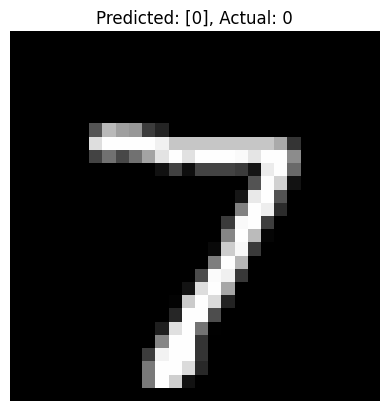

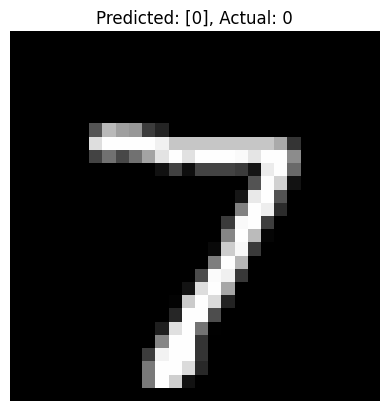

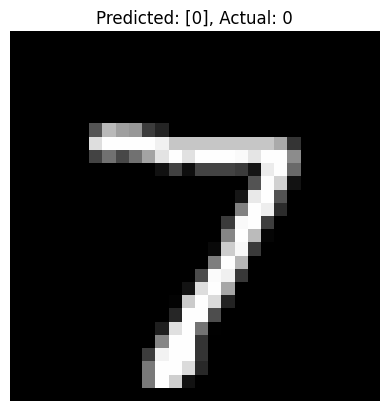

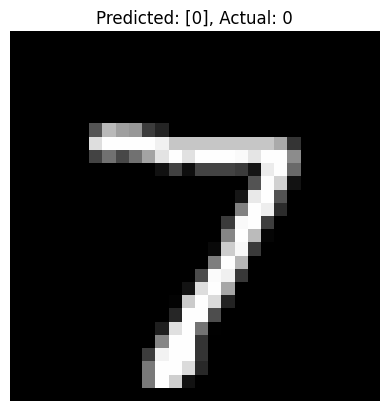

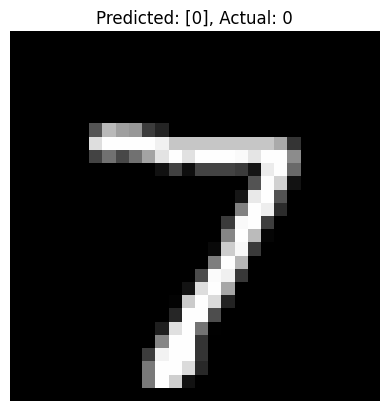

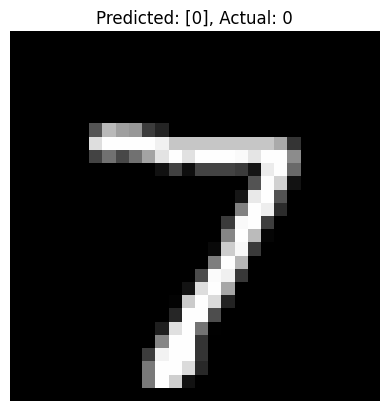

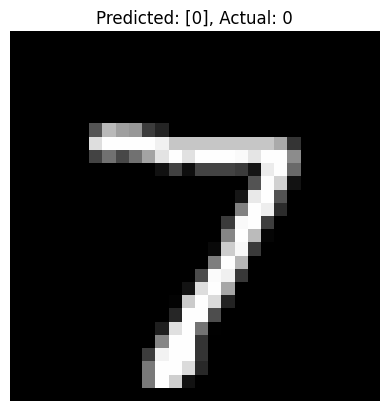

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9108
           1       0.69      0.96      0.81       892

    accuracy                           0.96     10000
   macro avg       0.84      0.96      0.89     10000
weighted avg       0.97      0.96      0.96     10000



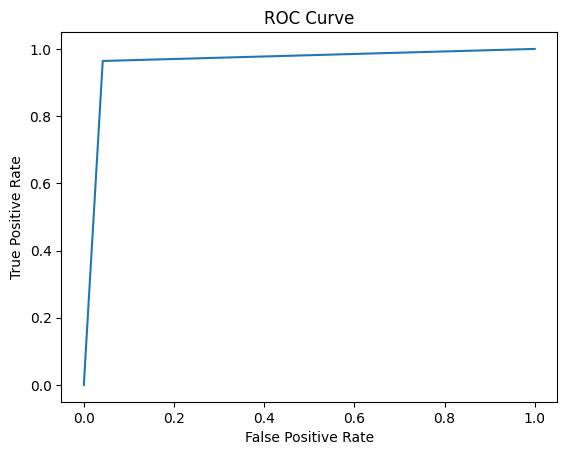

AUC: 0.9611


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Descargar y preprocesar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)

# Balancear los datos
X_train_5 = X_train[y_train == 1]
X_train_not_5 = X_train[y_train == 0][:X_train_5.shape[0]]
X_train_balanced = np.vstack((X_train_5, X_train_not_5))
y_train_balanced = np.hstack(([1] * X_train_5.shape[0], [0] * X_train_not_5.shape[0]))

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(
    X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
model = Sequential([
    Dense(2, activation='relu', input_shape=(784,)),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val_balanced, y_val_balanced),
                    epochs=50, batch_size=128, callbacks=[early_stopping])

# Graficar el histórico de accuracy y loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Mostrar imágenes de errores de clasificación
incorrect_idxs = np.where(y_pred != y_test)[0]
for idx in incorrect_idxs[:80]:
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred[idx]}, Actual: {y_test[idx]}')
    plt.axis('off')
    plt.show()

# Reportar métricas
print(classification_report(y_test, y_pred))

# Graficar la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc:.4f}')

# Determinar un umbral adecuado
# En este caso, un umbral de 0.5 es apropiado porque se trata de una clasificación binaria estándar y no se tiene un motivo para cambiarlo.
